In [ ]:
# spam Filter

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df=pd.read_csv("spam.csv",encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [20]:
df1=df[["v2","v1"]].rename(columns={"v2":"email","v1":"label"})


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   5572 non-null   object
 1   label   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [22]:
df1["label"].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [ ]:
# make some visualization


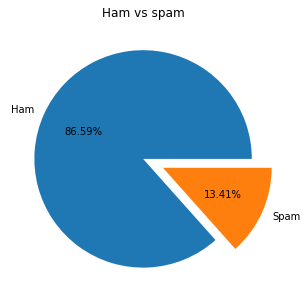

In [23]:

plt.figure(figsize=(5,5))
plt.pie(df1["label"].value_counts(),labels=["Ham","Spam"],autopct="%1.2f%%",explode=[0.0,0.2])
plt.title("Ham vs spam")
plt.show()

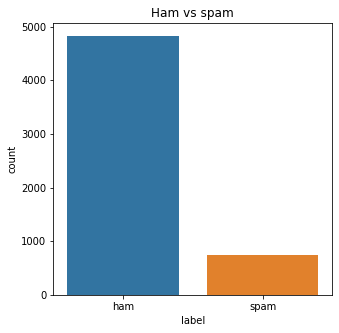

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(x=df1["label"])
plt.title("Ham vs spam")
plt.show()

In [25]:
# rename the target variable
df1["label"]=df1["label"].map({"ham":0,"spam":1})
df1["label"]

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

In [26]:
# create dependent and independent variable
X=df1["email"]
Y=df1["label"]

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=10)

In [97]:
X_train.tail()

1180                           I'm in chennai velachery:)
3441    Save money on wedding lingerie at www.bridal.p...
1344                     Were somewhere on Fredericksburg
4623    Jus finish blowing my hair. U finish dinner al...
1289    Hey...Great deal...Farm tour 9am to 5pm $95/pa...
Name: email, dtype: object

In [ ]:
# converting the text message into the form of bag of words

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
vectorizer=CountVectorizer()
new_x=vectorizer.fit(X_train)

In [33]:
X_train_vectorized=vectorizer.transform(X_train)

In [34]:
X_train_vectorized.dtype

dtype('int64')

In [35]:
X_train_vectorized.shape

(4457, 7757)

In [42]:
count_array = X_train_vectorized.toarray()
df100 = pd.DataFrame(data = count_array,columns = vectorizer.get_feature_names_out())

In [104]:
pd.set_option("display.max_columns",5000)
df100.head(10)

00  000  000pes  008704050406  0089  0121  01223585236  01223585334  \
0   0    0       0             0     0     0            0            0   
1   0    0       0             0     0     0            0            0   
2   0    0       0             0     0     0            0            0   
3   0    0       0             0     0     0            0            0   
4   0    0       0             0     0     0            0            0   
5   0    0       0             0     0     0            0            0   
6   0    0       0             0     0     0            0            0   
7   0    0       0             0     0     0            0            0   
8   0    0       0             0     0     0            0            0   
9   0    0       0             0     0     0            0            0   

   0125698789  02  0207  02072069400  02073162414  02085076972  021  03  04  \
0           0   0     0            0            0            0    0   0   0   
1           0   0     0            0            0            0    0   0   0   
2           0   0     0            0            0            0    0   0   0   
3           0   0     0            0            0            0    0   0   0   
4           0   0     0            0            0            0    0   0   0   
5           0   0     0            0            0            0    0   0   0   
6           0   0     0            0            0            0    0   0   0   
7           0   0     0            0            0            0    0   0   0   
8           0   0     0            0            0            0    0   0   0   
9           0   0     0            0            0            0    0   0   0   

   0430  05  050703  0578  06  07  07046744435  07090201529  07090298926  \
0     0   0       0     0   0   0            0            0            0   
1     0   0       0     0   0   0            0            0            0   
2     0   0       0     0   0   0            0            0            0   
3     0   0       0     0   0   0            0            0            0   
4     0   0       0     0   0   0            0            0            0   
5     0   0       0     0   0   0            0            0            0   
6     0   0       0     0   0   0            0            0            0   
7     0   0       0     0   0   0            0            0            0   
8     0   0       0     0   0   0            0            0            0   
9     0   0       0     0   0   0            0            0            0   

   07099833605  07123456789  07734396839  07742676969  07753741225  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   
5            0            0            0            0            0   
6            0            0            0            0            0   
7            0            0            0            0            0   
8            0            0            0            0            0   
9            0            0            0            0            0   

   0776xxxxxxx  07781482378  07786200117  077xxx  078  07801543489  \
0            0            0            0       0    0            0   
1            0            0            0       0    0            0   
2            0            0            0       0    0            0   
3            0            0            0       0    0            0   
4            0            0            0       0    0            0   
5            0            0            0       0    0            0   
6            0            0            0       0    0            0   
7            0            0            0       0    0            0   
8            0            0            0       0    0            0   
9         

In [120]:
new=pd.DataFrame(X_train_vectorized)
new.head()

,0
0,"(0, 938)\t1\n (0, 2369)\t1\n (0, 3514)\t1\..."
1,"(0, 938)\t1\n (0, 1024)\t1\n (0, 1180)\t1\..."
2,"(0, 741)\t1\n (0, 913)\t1\n (0, 1566)\t1\n..."
3,"(0, 870)\t1\n (0, 913)\t1\n (0, 1267)\t1\n..."
4,"(0, 1169)\t1\n (0, 3170)\t1\n (0, 5000)\t1..."


In [40]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB

In [113]:
model=MultinomialNB(alpha=0.01)
model.fit(X_train_vectorized,Y_train)

MultinomialNB(alpha=0.02)

In [114]:
predictions=model.predict(vectorizer.transform(X_test))

In [115]:
print("Accuracy",100*sum(predictions==Y_test)/len(predictions))

Accuracy 98.65470852017937


In [77]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [116]:
print("classification_report \n",classification_report(Y_test,predictions))

classification_report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.94      0.95       150

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [118]:
print("confusion matrix \n",confusion_matrix(Y_test,predictions))

confusion matrix 
 [[959   6]
 [  9 141]]


In [ ]:
# create a function to paas new text and check 

In [59]:
def enter_text(message):
    if model.predict(vectorizer.transform([message]))==1:
        print("This is a spam")
    else:
        print("This is a not spam , please reconfim manually")

In [ ]:
# use the function

In [60]:
enter_text("hello how are you friend")

This is a not spam , please reconfim manually


In [61]:
enter_text("WINNER  you secret code is M112")

This is a spam


In [105]:
enter_text("job offer from usa, we will call u tomorrow ")

This is a not spam , please reconfim manually


In [92]:
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier()

In [93]:
rf=RandomForestClassifier()
rf.fit(X_train_vectorized,Y_train)

RandomForestClassifier()

In [94]:
predictions_rf=rf.predict(vectorizer.transform(X_test))

In [95]:
print("classification_report \n",classification_report(Y_test,predictions_rf))

classification_report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [96]:
print("confusion matrix \n",confusion_matrix(Y_test,predictions_rf))

confusion matrix 
 [[965   0]
 [ 30 120]]
